<a href="https://colab.research.google.com/github/srikumar03/Loan_Prediction_System_Using_SVM_-_ANN/blob/main/R%26D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train (1).csv")

In [ ]:
print(data.shape)

(614, 13)


In [ ]:
print(data.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
print(data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           Y  
2             1.0   

In [ ]:
print(data.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [ ]:
print(data.count())
print("===============================================================================")
print(data.sum())


Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64
Loan_ID              LP001002LP001003LP001005LP001006LP001008LP0010...
Education            GraduateGraduateGraduateNot GraduateGraduateGr...
ApplicantIncome                                                3317724
CoapplicantIncome                                        995444.919989
LoanAmount                                                     86676.0
Loan_Amount_Term                                              205200.0
Credit_History                                                   475.0
Property_Area        UrbanRuralUrbanUrbanUrbanUrbanUrbanSemiurbanUr...
Loan_Status          YYYYYYYNYNYYYNYYYNNYNYNNNYYYNYNNNYNYNYYYNYYYYY...
dtype: object


<ipython-input-6-0ba493d0564d>:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.sum())


In [ ]:

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data=data.dropna()
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
data.replace({'Loan_Status':{'N':0,'Y':1},'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
              'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
data=data.replace(to_replace="3+",value=3)

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
X=data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=data['Loan_Status']

print(X)
print("\n=======================================\n")
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          3          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

<Axes: xlabel='Education', ylabel='count'>

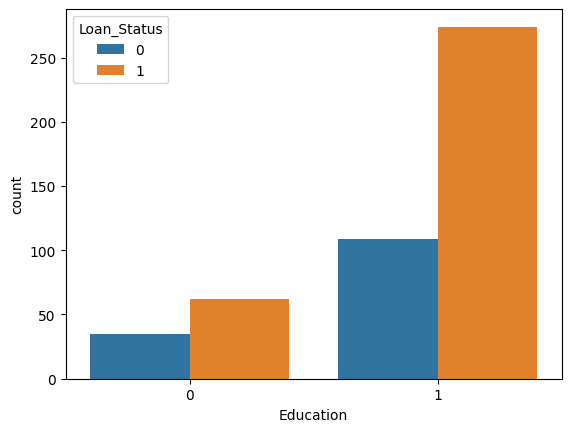

In [ ]:
import seaborn as sns
sns.countplot(x="Education",hue="Loan_Status",data=data)

In [ ]:
data=data.drop('Loan_ID',axis=1)
data.to_csv('modified_data.csv',index=False)

# **Hybrid Model**

In [ ]:
x = data.iloc[:, 0:11]
print(x)
y = data.iloc[:, 11:]
print(y)


     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          3          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
#Ensemble Model
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
x, y = make_classification(n_features=10, n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
ann_clf = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)
svm_clf = SVC(kernel='linear', probability=True)
estimators = [('ann', ann_clf), ('svm', svm_clf)]
clf = StackingClassifier(estimators=estimators, final_estimator=MLPClassifier())
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(f"Accuracy: {score:.2f}")

from sklearn.metrics import precision_score, recall_score, f1_score


y_pred = clf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Accuracy: 0.92
Precision: 0.97
Recall: 0.88
F1-score: 0.92


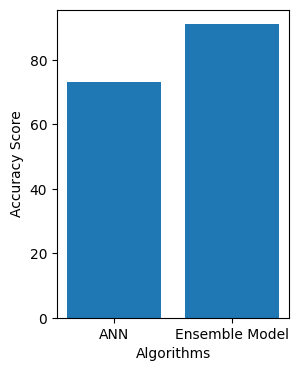

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(3,4),'figure.dpi':100})
Xplot=["ANN","Ensemble Model"]
Yplot=[73,91]
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.bar(Xplot,Yplot)
plt.show()

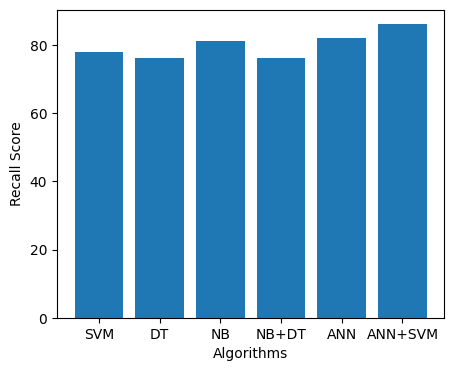

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(5,4),'figure.dpi':100})
Xplot=["SVM","DT","NB","NB+DT","ANN","ANN+SVM"]
Yplot=[78,76,81,76,82,86]
plt.xlabel("Algorithms")
plt.ylabel("Recall Score")
plt.bar(Xplot,Yplot)
plt.show()

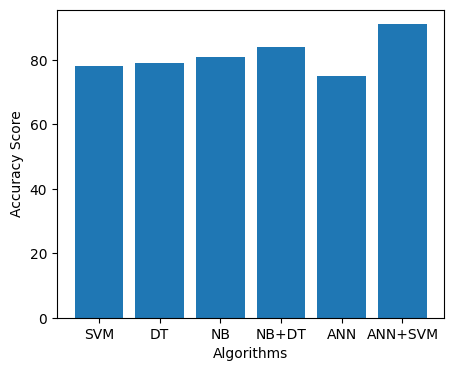

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(5,4),'figure.dpi':100})
Xplot=["SVM","DT","NB","NB+DT","ANN","ANN+SVM"]
Yplot=[78,79,81,84,75,91]
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.bar(Xplot,Yplot)
plt.show()
